# 課題「カタカタ15文字を自動識別するモデルの構築」
ここでは、課題に取り組むにあたり参考となる情報をまとめています

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import glob
import os,sys
from sklearn.preprocessing import LabelBinarizer

dic_katakana = {"a":0,"i":1,"u":2,"e":3,"o":4,"ka":5,"ki":6,"ku":7,"ke":8,"ko":9,"sa":10,"si":11,"su":12,"se":13,"so":14}
pixel = 28

## データの読み込み

In [2]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print(train_data.shape)
print(train_label.shape)

(3000, 1, 28, 28)
(3000, 15)


## 元画像を表示させる方法
元画像は、28ピクセル*28ピクセルのサイズで、0から255までのグレースケール画像です。

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


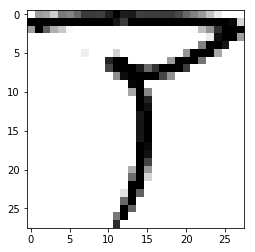

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


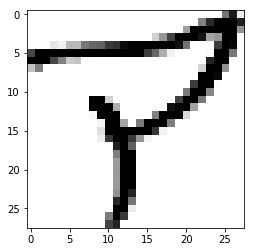

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


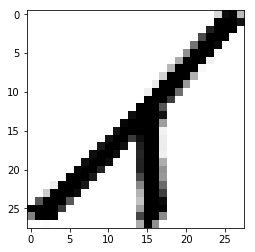

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


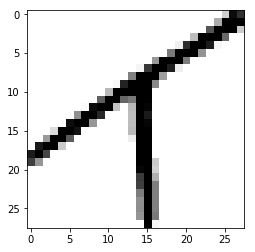

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


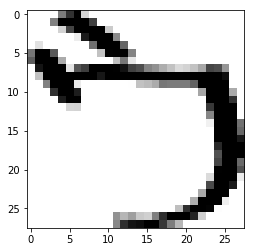

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


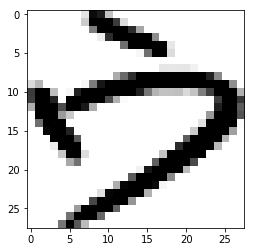

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


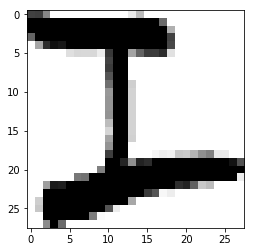

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


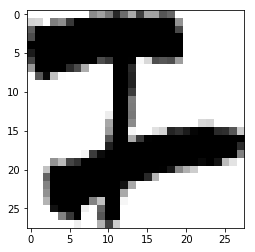

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


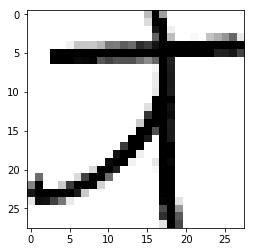

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


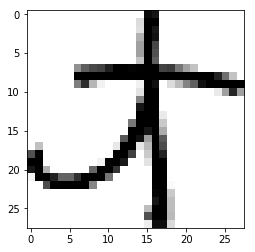

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


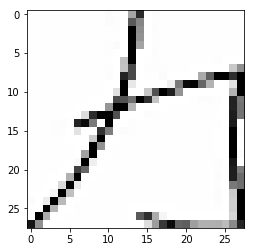

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


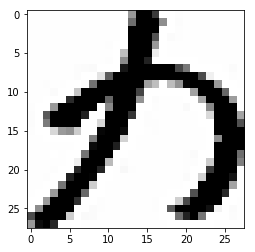

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


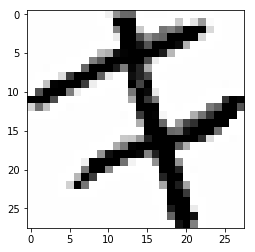

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


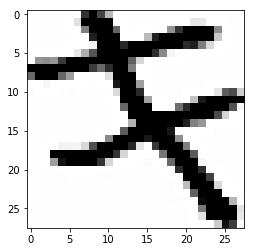

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


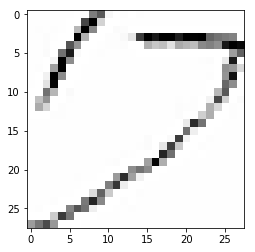

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


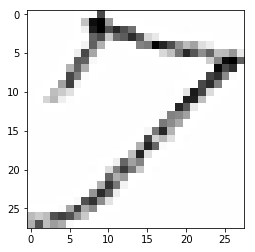

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


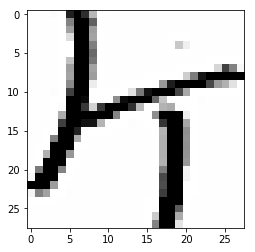

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


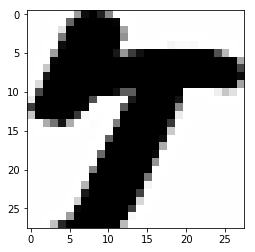

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


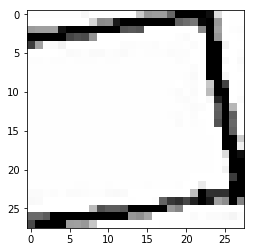

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


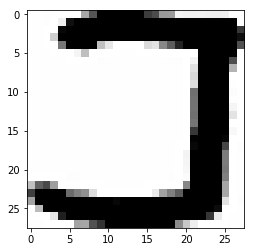

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


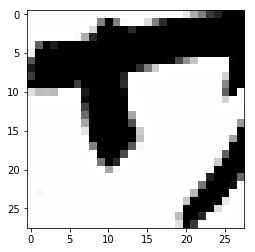

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


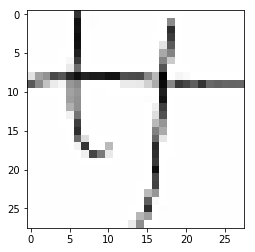

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


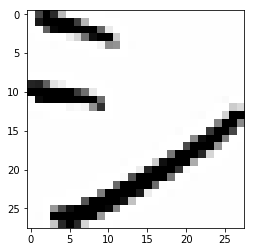

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


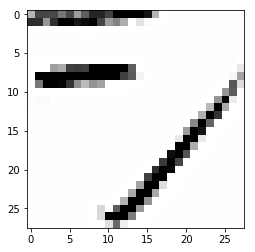

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


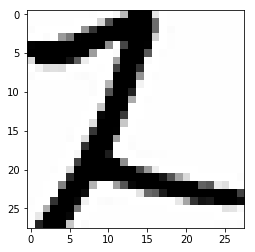

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


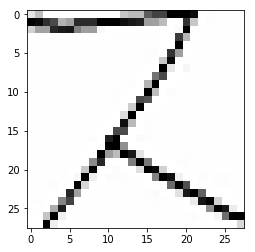

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


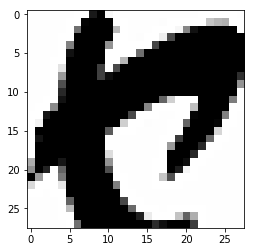

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


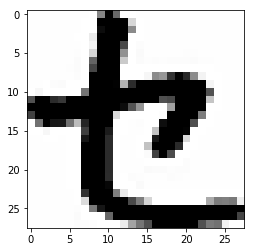

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


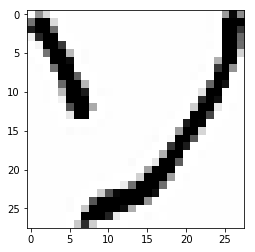

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


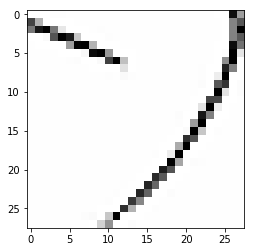

In [3]:
for i in range(15):
    count = 0
    for ind in range(1000):
        # カタカナ番号
        num = np.where(train_label[ind])[0][0]
        if num==i:
            img = train_data[ind]
            label = train_label[ind]    
            print(label)
            plt.imshow(img[0,:,:], cmap='gray')
            plt.show()
            count += 1
            if count==2:
                break

## 前処理の例

In [4]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
print(train_data)
print()

[[[[0.99607843 0.99607843 0.99607843 ... 1.         1.
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.6901961  1.
    1.        ]
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    1.        ]
   ...
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]]]


 [[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    0.        ]
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    0.2627451 ]
   [0.99607843 0.99607843 0.99607843 ... 0.9490196  1.
    1.        ]]]


 [[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]

## 課題への取り組み方
* 講義の中でDNNの各種関数を実装する方法を紹介します。それを踏まえ、できるだけ自分で実装したDNNを用いて計算してみてください。
* どうしても自分でDNNを実装することが難しい方や、高度なモデルを試してみたい方は、最新版のTensorFlow+kerasを使って計算してください。
* 講義の中でCNNを紹介するのはDAY6です。DAY5に行う中間発表で報告する内容は、全結合型NNでの計算結果で構いません。
* trainデータは、アイウエオカキクケコサシスセソそれぞれ200枚ずつの合計3000枚です。これは講座開始時に配布します。
* testデータは、アイウエオそれぞれ1300枚ずつとカキクケコサシスセソそれぞれ800枚ずつの合計14500枚です。これは講座終了後も受講者へは配布しません。
* 学習済みモデルが完成したら、submit_katakana.ipynbを完成させ、submit_katakana.ipynb、学習済みモデル、自作コードなどを同じディレクトリに納めzipし、識別精度算出ウェブサイトへ投稿してください。
* testデータに対する識別精度結果が講座修了要件の一つになります。その基準値は別途ご連絡します。